<a href="https://colab.research.google.com/github/Prathambiradr12345/Machine-_learning/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Simple polynomial regression=y=B0+B1X1+........+bnxn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

In [10]:
X=6*np.random.rand(200,1)-3
y=0.8*X**2+0.9*X+2+np.random.randn(200,1)

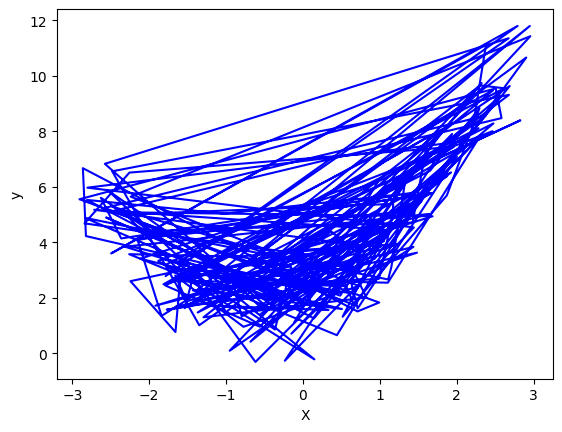

In [11]:
plt.plot(X,y,'b')
plt.xlabel("X")
plt.ylabel('y')
plt.show()

In [12]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [13]:
#apply
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)


0.36886824721136013

AttributeError: module 'matplotlib.pyplot' has no attribute 'Xlabel'

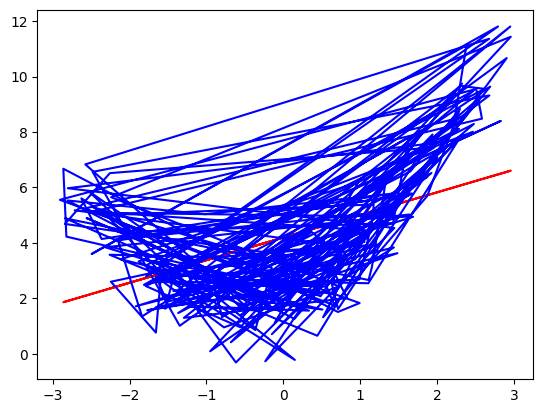

In [17]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X,y,'b')
plt.Xlabel('X')
plt.ylabel('y')
plt.show()

In [18]:
#polynomial
poly=PolynomialFeatures(degree=2)
X_train_trans=poly.fit_transform(X_train)
X_test_trans=poly.fit_transform(X_test)

In [19]:
print(X_train[0])
print(X_train_trans[0])

[1.42613087]
[1.         1.42613087 2.03384925]


In [20]:
#include bias parameter
lr=LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [21]:
y_pred=lr.predict(X_test_trans)
r2_score(y_test,y_pred)

0.878380725145427

In [23]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.88795377 0.79529766]]
[2.08906715]


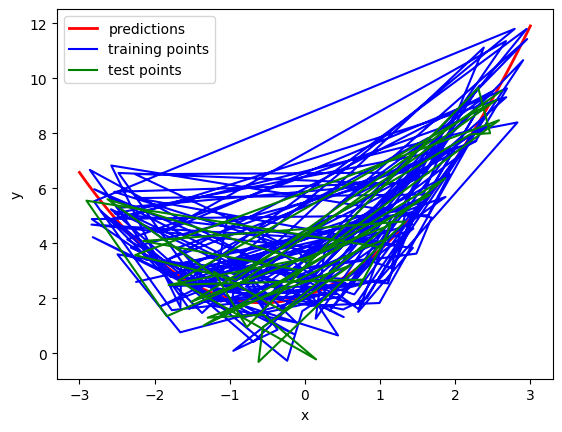

In [28]:
X_new=np.linspace(-3,3,100).reshape(100,1)
X_new_poly=poly.transform(X_new)
y_new=lr.predict(X_new_poly)
plt.plot(x_new,y_new,color='r',linewidth=2,label='predictions')
plt.plot(X_train,y_train,'b',label='training points')
plt.plot(X_test,y_test,'g',label='test points')
plt.xlabel("x")
plt.ylabel('y')
plt.legend()
plt.show()

In [29]:
#multi polynomial regression
x=7*np.random.rand(100,1)-2.8
y=7*np.random.rand(100,1)-2.8
z=x**2+y**2+0.2*x+0.2*y+0.1*x*y+2+np.random.randn(100,1)


In [30]:
import plotly.express as px
df=px.data.iris()
fig=px.scatter_3d(df,x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.show()

In [31]:
lr=LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)
x_input=np.linspace(x.min(),x.max(),10)
y_input=np.linspace(y.min(),y.max(),10)
xGrid,yGrid=np.meshgrid(x_input,y_input)
final=np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T
z_final=lr.predict(final).reshape(10,10)

In [32]:
import plotly.graph_objects as go
fig=px.scatter_3d(df,x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.add_trace(go.Surface(x=x_input,y=y_input,z=z_final))
fig.show()

In [39]:
x_multi=np.array([x,y]).reshape(100,2)
x_multi.shape

poly=PolynomialFeatures(degree=3)
x_multi_trans=poly.fit_transform(x_multi)

In [40]:
print('Input',poly.n_input_features_)
print('output',poly.n_output_features_)
print('powers\n',poly.powers_)

AttributeError: 'PolynomialFeatures' object has no attribute 'n_input_features_'